# PYTHON CODE FOR SIMPLE LINEAR REGRESSION

# Read Dataset

In [1]:
import numpy as np
import pandas as pd

# Load the dataset
df = pd.read_csv('sample_data/california_housing_train.csv')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


In [2]:
X = df['population']
y = df['total_bedrooms']

# Plotting Dataset

Text(0, 0.5, 'Total Bedrooms')

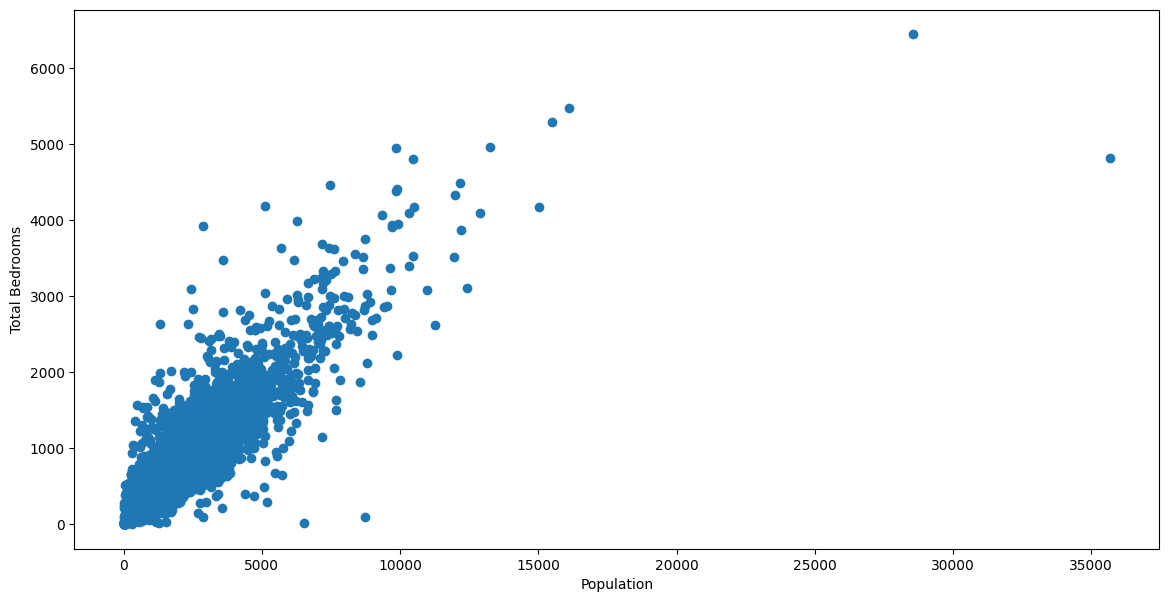

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
plt.scatter(X, y)
plt.xlabel('Population')
plt.ylabel('Total Bedrooms')

# Preprocessing Dataset

In [4]:
# Splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [5]:
X_train # Dataframe

9432      608.0
13901    1773.0
6832     2586.0
5226     1108.0
16888     895.0
          ...  
11284    1175.0
11964     356.0
5390      760.0
860      3293.0
15795    1932.0
Name: population, Length: 11390, dtype: float64

In [6]:
X_train.to_numpy() # 1 Dimension Array

array([ 608., 1773., 2586., ...,  760., 3293., 1932.])

In [7]:
X_train.to_numpy().reshape(-1, 1) # 2 Dimension Array

array([[ 608.],
       [1773.],
       [2586.],
       ...,
       [ 760.],
       [3293.],
       [1932.]])

# Modelling

$Y = β_0 + β_1X + ε$

In [8]:
from sklearn.linear_model import LinearRegression

# Create linear regression object
model_lr = LinearRegression()

# Train the model using the training sets
model_lr.fit(X_train.to_numpy().reshape(-1, 1), y_train)

LinearRegression()

In [9]:
# Print The Regression Coefficients
model_lr.coef_

array([0.3145052])

In [10]:
print('Coefficients: ', model_lr.coef_)

Coefficients:  [0.3145052]


In [11]:
# Print The Regression Intercept/Bias
model_lr.intercept_

88.23394943638453

In [12]:
print('Intercept: ', model_lr.intercept_)

Intercept:  88.23394943638453


# Testing the Model

In [13]:
y_tr_pred = model_lr.predict(X_train.to_numpy().reshape(-1, 1))

In [14]:
y_tr_pred

array([ 279.45311063,  645.85166784,  901.5443949 , ...,  327.25790093,
       1123.89957082,  695.85799454])

In [15]:
y_te_pred = model_lr.predict(X_test.to_numpy().reshape(-1, 1))

# Performance Evaluation Model

In [16]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
import numpy as np

# Performance Evaluation on Training Data
lr_train_rms = np.sqrt(mean_squared_error(y_tr_pred,y_train))
lr_train_r2 = r2_score(y_tr_pred,y_train)
# lr_train_mae = mean_absolute_error(y_tr_pred,y_train)
# lr_train_mape = mean_absolute_percentage_error(y_tr_pred,y_train)
# lr_train_mse = mean_squared_error(y_tr_pred,y_train)

print('Root Mean Square Error: ', lr_train_rms)
print('R2 Scored: ', lr_train_r2)
# print('Mean Absolute Error: ', lr_train_mae)
# print('Mean Absolute Percentage Error: ', lr_train_mape)
# print('Mean Square Error: ', lr_train_mse)

Root Mean Square Error:  208.15361021590383
R2 Scored:  0.6903007221986435


In [17]:
# Performance Evaluation on Testing Data
lr_test_rms = np.sqrt(mean_squared_error(y_te_pred,y_test))
lr_test_r2 = r2_score(y_te_pred,y_test)
# lr_test_mae = mean_absolute_error(y_te_pred,y_test)
# lr_test_mape = mean_absolute_percentage_error(y_te_pred,y_test)
# lr_test_mse = mean_squared_error(y_te_pred,y_test)

print('Root Mean Square Error: ', lr_test_rms)
print('R2 Scored: ', lr_test_r2)
# print('Mean Absolute Error: ', lr_test_mae)
# print('Mean Absolute Percentage Error: ', lr_test_mape)
# print('Mean Square Error: ', lr_test_mse)

Root Mean Square Error:  180.8528681899907
R2 Scored:  0.7048200673200353


# Plotting the Result

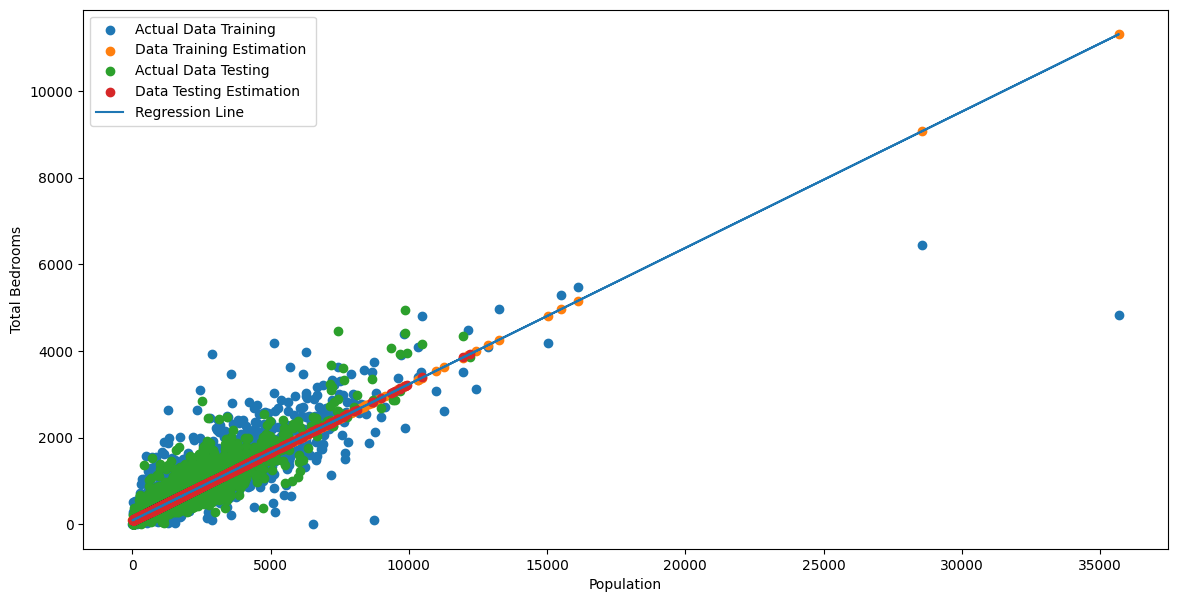

In [18]:
plt.figure(figsize=(14, 7))
plt.scatter(X_train,y_train, label='Actual Data Training')
plt.scatter(X_train,y_tr_pred, label='Data Training Estimation ')
plt.scatter(X_test,y_test, label='Actual Data Testing')
plt.scatter(X_test,y_te_pred, label='Data Testing Estimation')

# plotting the regression line
plt.plot(X_train, y_tr_pred, label='Regression Line')

plt.xlabel('Population')
plt.ylabel('Total Bedrooms')
plt.legend()
plt.show()